In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv")

In [3]:
from datetime import datetime

In [4]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-02,Alabama,24547.0,0.0,9220.0,7172.0,353.0,490,0.0,15.0,...,0.0,0.0,0.0,29.0,39.0,4.0,0.0,1.0,2.0,45171
1,2018-02,Alaska,214.0,0.0,2279.0,1948.0,268.0,166,0.0,2.0,...,0.0,0.0,0.0,17.0,5.0,6.0,0.0,0.0,0.0,5392
2,2018-02,Arizona,6513.0,435.0,14966.0,9058.0,1341.0,934,0.0,15.0,...,0.0,0.0,0.0,20.0,18.0,5.0,0.0,2.0,0.0,36281
3,2018-02,Arkansas,4341.0,970.0,7671.0,6405.0,338.0,614,48.0,18.0,...,0.0,0.0,0.0,24.0,33.0,3.0,0.0,0.0,0.0,24266
4,2018-02,California,39165.0,0.0,38531.0,24768.0,3940.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107649


In [5]:
def convert_date(dtstr):

    return datetime.strptime(dtstr,"%Y-%m").date()

convert_date("2018-02")

datetime.date(2018, 2, 1)

In [6]:
def convert_datetime(dtstr):

    return datetime.strptime(dtstr,"%Y-%m")


In [7]:
df["dt"] = df["month"].apply(convert_date)
df["dtt"] = df["month"].apply(convert_datetime)

In [8]:
ct = df[df["state"] == "Connecticut"]

In [9]:
ct.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,dt,dtt
6,2018-02,Connecticut,6597.0,371.0,5918.0,2269.0,462.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15617,2018-02-01,2018-02-01
61,2018-01,Connecticut,6015.0,503.0,5044.0,1829.0,384.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13775,2018-01-01,2018-01-01
116,2017-12,Connecticut,5424.0,325.0,6646.0,2630.0,430.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15455,2017-12-01,2017-12-01
171,2017-11,Connecticut,5096.0,415.0,5757.0,2708.0,358.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14334,2017-11-01,2017-11-01
226,2017-10,Connecticut,5093.0,453.0,5112.0,2233.0,310.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13201,2017-10-01,2017-10-01


In [10]:
import us

In [11]:
state_names = map(lambda x: x.name, us.STATES)
state_names

[u'Alabama',
 u'Alaska',
 u'Arizona',
 u'Arkansas',
 u'California',
 u'Colorado',
 u'Connecticut',
 u'Delaware',
 u'District of Columbia',
 u'Florida',
 u'Georgia',
 u'Hawaii',
 u'Idaho',
 u'Illinois',
 u'Indiana',
 u'Iowa',
 u'Kansas',
 u'Kentucky',
 u'Louisiana',
 u'Maine',
 u'Maryland',
 u'Massachusetts',
 u'Michigan',
 u'Minnesota',
 u'Mississippi',
 u'Missouri',
 u'Montana',
 u'Nebraska',
 u'Nevada',
 u'New Hampshire',
 u'New Jersey',
 u'New Mexico',
 u'New York',
 u'North Carolina',
 u'North Dakota',
 u'Ohio',
 u'Oklahoma',
 u'Oregon',
 u'Pennsylvania',
 u'Rhode Island',
 u'South Carolina',
 u'South Dakota',
 u'Tennessee',
 u'Texas',
 u'Utah',
 u'Vermont',
 u'Virginia',
 u'Washington',
 u'West Virginia',
 u'Wisconsin',
 u'Wyoming']

In [12]:
df[df["state"].apply(lambda x: x not in state_names)]["state"].unique()

array(['Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'],
      dtype=object)

In [13]:
ct.sort_values(by="dt").head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,dt,dtt
12711,1998-11,Connecticut,17.0,NaN,19.0,35.0,NaN,0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,1998-11-01,1998-11-01
12656,1998-12,Connecticut,2800.0,NaN,1502.0,2451.0,NaN,6,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6790,1998-12-01,1998-12-01
12601,1999-01,Connecticut,3010.0,NaN,1636.0,1563.0,NaN,4,52.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6265,1999-01-01,1999-01-01
12546,1999-02,Connecticut,4526.0,NaN,1736.0,1802.0,NaN,1,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8069,1999-02-01,1999-02-01
12491,1999-03,Connecticut,3689.0,NaN,2042.0,2132.0,NaN,2,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7877,1999-03-01,1999-03-01


In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

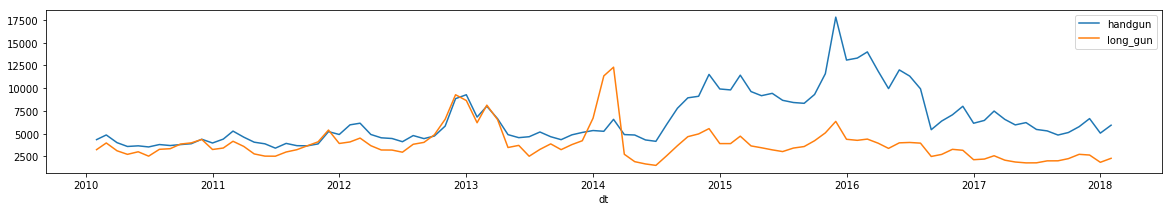

In [15]:
ct[ct["dt"].apply(lambda x: x > datetime(2010,1,1).date())].sort_values(by="dt").set_index("dt")[["handgun","long_gun"]].plot.line(figsize=(20,3))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


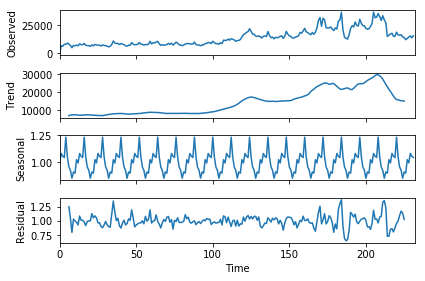

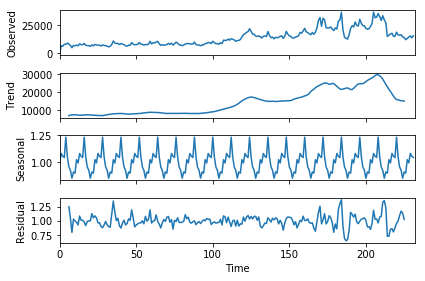

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
# #series = Series.from_csv('airline-passengers.csv', header=0)
# result = seasonal_decompose(ct.set_index("dt")["totals"], model='multiplicative')
# result.plot()
# pyplot.show()
ct_seasonal = ct
ct_seasonal['Date'] = pd.to_datetime(ct_seasonal['dtt'])
ct_seasonal = ct_seasonal.sort_values(by="Date").set_index("Date")
ct_seasonal
#np.asarray(ct_seasonal["totals"].astype(int))
decomp = seasonal_decompose(np.asarray(ct_seasonal["totals"].astype(int)),
                            freq=12,
                           model="multiplicative")
decomp.plot()

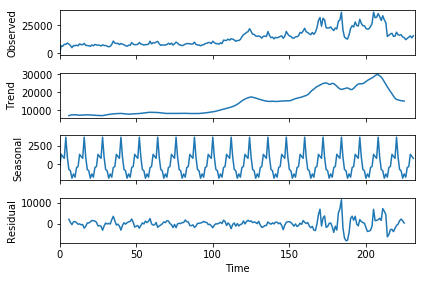

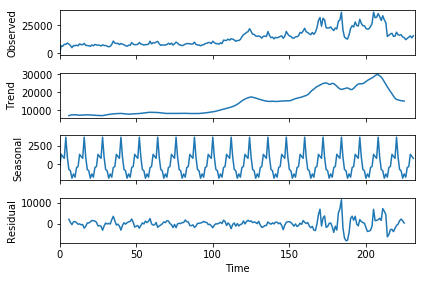

In [119]:
seasonal_decompose(np.asarray(ct_seasonal["totals"].astype(int)),
                            freq=12,
                           model="additive").plot()

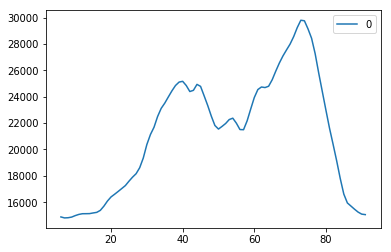

In [124]:
pd.DataFrame(decomp.trend + decomp.resid).plot()

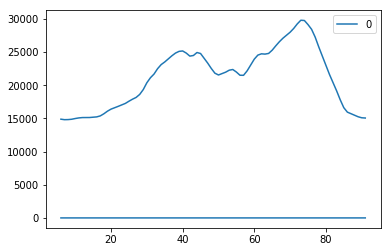

In [128]:
pd.concat([pd.DataFrame(decomp.resid),
          pd.DataFrame(decomp.trend)]).plot()

In [41]:
decomp.trend

array([           nan,            nan,            nan,            nan,
                  nan,            nan,  6863.        ,  7201.33333333,
        7325.58333333,  7366.08333333,  7386.33333333,  7337.16666667,
        7197.16666667,  7137.91666667,  7182.91666667,  7254.25      ,
        7278.54166667,  7304.16666667,  7356.58333333,  7343.25      ,
        7276.20833333,  7205.25      ,  7102.54166667,  7042.875     ,
        7035.375     ,  7014.83333333,  6979.04166667,  6911.41666667,
        6909.29166667,  7084.58333333,  7285.125     ,  7416.25      ,
        7547.20833333,  7671.70833333,  7775.125     ,  7877.33333333,
        7959.70833333,  8007.625     ,  8044.54166667,  8110.625     ,
        8120.70833333,  8029.33333333,  7933.08333333,  7846.625     ,
        7753.5       ,  7714.75      ,  7758.41666667,  7800.95833333,
        7816.08333333,  7847.625     ,  7932.125     ,  8014.75      ,
        8077.625     ,  8168.5       ,  8223.875     ,  8305.41666667,
      

In [42]:
plt.show()

In [43]:
ct[ct["dt"].apply(lambda x: (x > datetime(2010,1,1).date()) & (x  < datetime(2014,1,1).date()))].sort_values(by="dt").set_index("dt")[["handgun","long_gun"]].corr()

,handgun,long_gun
handgun,1.00000,0.91292
long_gun,0.91292,1.00000


In [44]:
ct[ct["dt"].apply(lambda x: (x > datetime(2014,1,1).date()))].sort_values(by="dt").set_index("dt")[["handgun","long_gun"]].corr()

,handgun,long_gun
handgun,1.000000,0.349255
long_gun,0.349255,1.000000


# Make a "recent/CT" subset

Start Jan 1, 2010.

In [45]:
ct_recent = ct[ct["dt"].apply(lambda x: x >= datetime(2010,1,1).date())].sort_values(by="dt")
#ct_recent = ct_recent.set_index("dt")
ct_recent.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,dt,dtt,Date
5341,2010-01,Connecticut,7855.0,NaN,4147.0,3316.0,20.0,0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,15346,2010-01-01,2010-01-01,2010-01-01
5286,2010-02,Connecticut,7349.0,NaN,4327.0,3223.0,22.0,0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,14929,2010-02-01,2010-02-01,2010-02-01
5231,2010-03,Connecticut,10516.0,NaN,4842.0,3959.0,58.0,0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,19380,2010-03-01,2010-03-01,2010-03-01
5176,2010-04,Connecticut,8726.0,NaN,3994.0,3098.0,97.0,0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,15922,2010-04-01,2010-04-01,2010-04-01
5121,2010-05,Connecticut,7571.0,NaN,3574.0,2706.0,34.0,0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13890,2010-05-01,2010-05-01,2010-05-01


In [46]:
# Make sure it's only CT
ct_recent["state"].value_counts()

Connecticut    98
Name: state, dtype: int64

In [47]:
""" Import selected mass shooting dates to make plot lines. 

Here's the data structure for plotlines in HighCharts

{
    color: 'red', // Color value
    dashStyle: 'longdashdot', // Style of the plot line. Default to solid
    value: 3, // Value of where the line will appear
    width: 2 // Width of the line    
}

So the main thing is lining up the months with their integer index based on the start date
desired for the chart. The permit data begins in 1998, but colleague wants Jan 2010 forward.

Since plot lines have to line up with x axis indexes, I will drop the day of the month values
  
"""

lines = pd.read_csv("dates.tsv", sep="\t")
lines.head()

,date,location
0,8-3-2010,"Manchester, Conn."
1,1-8-2011,"Tuscon, Ariz."
2,7-20-2012,"Aurora, Colo."
3,12-14-2012,"Newtwon, Conn."
4,9-16-2013,"Washington, D.C."


In [48]:
lines["dt"] = lines["date"].apply(lambda x: datetime.strptime(x,"%m-%d-%Y"))
#lines = lines.set_index("dt")
lines.head()

,date,location,dt
0,8-3-2010,"Manchester, Conn.",2010-08-03
1,1-8-2011,"Tuscon, Ariz.",2011-01-08
2,7-20-2012,"Aurora, Colo.",2012-07-20
3,12-14-2012,"Newtwon, Conn.",2012-12-14
4,9-16-2013,"Washington, D.C.",2013-09-16


In [49]:
# Remove the day of the month so these line up with values in the ct_recent df
lines["month"] = lines["dt"].map(lambda x: x.strftime("%Y-%m"))
lines

,date,location,dt,month
0,8-3-2010,"Manchester, Conn.",2010-08-03,2010-08
1,1-8-2011,"Tuscon, Ariz.",2011-01-08,2011-01
2,7-20-2012,"Aurora, Colo.",2012-07-20,2012-07
3,12-14-2012,"Newtwon, Conn.",2012-12-14,2012-12
4,9-16-2013,"Washington, D.C.",2013-09-16,2013-09
5,6-18-2015,"Charleston, S.C.",2015-06-18,2015-06
6,10-1-2015,"Roseburg, Ore.",2015-10-01,2015-10
7,12-2-2015,"San Bernardino, Calif.",2015-12-02,2015-12
8,6-12-2016,"Orlando, Fla.",2016-06-12,2016-06
9,10-1-2017,"Las Vegas, Nev.",2017-10-01,2017-10


In [50]:
# now pare own the cols and join 
chart = ct_recent[["month","totals"]].set_index('month')\
.join(lines[["month","location","dt"]].set_index("month"))\
.reset_index()

chart

,month,totals,location,dt
0,2010-01,15346,NaN,NaT
1,2010-02,14929,NaN,NaT
2,2010-03,19380,NaN,NaT
3,2010-04,15922,NaN,NaT
4,2010-05,13890,NaN,NaT
5,2010-06,14432,NaN,NaT
6,2010-07,12848,NaN,NaT
7,2010-08,14183,"Manchester, Conn.",2010-08-03
8,2010-09,13743,NaN,NaT
9,2010-10,14371,NaN,NaT


In [51]:
# Now make the labels
labels = chart[chart["location"].notnull()]
labels

,month,totals,location,dt
7,2010-08,14183,"Manchester, Conn.",2010-08-03
12,2011-01,13324,"Tuscon, Ariz.",2011-01-08
30,2012-07,16544,"Aurora, Colo.",2012-07-20
35,2012-12,29246,"Newtwon, Conn.",2012-12-14
44,2013-09,21666,"Washington, D.C.",2013-09-16
65,2015-06,24605,"Charleston, S.C.",2015-06-18
69,2015-10,23918,"Roseburg, Ore.",2015-10-01
71,2015-12,36673,"San Bernardino, Calif.",2015-12-02
77,2016-06,33475,"Orlando, Fla.",2016-06-12
93,2017-10,13201,"Las Vegas, Nev.",2017-10-01


In [52]:
import json

In [78]:
def make_plotline(row,val):
    ret = {
        "color": 'gray', # Color value
        "dashStyle": 'solid', # Style of the plot line. Default to solid
        "value": val,
        #"value": row["month"], # Value of where the line will appear
        #"value": "Date.UTC(2011,3,1)",
        "width": 1, # Width of the line,
        "label": { 
            "text": row["location"]
        }
    }
    
    #ret["value"] = None
    return ret

def make_plotlines_object():
    ret = []
    for i, row in labels.iterrows():
        ret.append(make_plotline(row,i))
    return ret

make_plotlines_object()


[{'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Manchester, Conn.'},
  'value': 7,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Tuscon, Ariz.'},
  'value': 12,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Aurora, Colo.'},
  'value': 30,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Newtwon, Conn.'},
  'value': 35,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Washington, D.C.'},
  'value': 44,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Charleston, S.C.'},
  'value': 65,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Roseburg, Ore.'},
  'value': 69,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'San Bernardino, Calif.'},
  'value': 71,
  'width': 1},
 {'color': 'gray',
  'dashStyle': 'solid',
  'label': {'text': 'Orlando, Fla.'},
  'value': 

In [79]:
open("plotlines.json","w").write(json.dumps(make_plotlines_object(),indent=2))

In [55]:
ct_recent[["month","totals"]].to_csv("total-checks-ct-recent.tsv",
                                     index=False,
                                     sep="\t")

In [91]:
decomp = seasonal_decompose(np.asarray(ct_recent["totals"].astype(int)),
                            freq=12,
                           model="multiplicative")

ct_recent_chart = ct_recent[["month","totals"]]
ct_recent_chart["adj_mult"] = decomp.trend

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
decomp_add = seasonal_decompose(np.asarray(ct_recent["totals"].astype(int)),
                            freq=12,
                           model="additive")


In [96]:
ct_recent_chart.to_csv("seasonality-total-checks-ct-recent.tsv",
                       index=False,sep="\t")

In [110]:
ct_recent_chart["adj_add"] = decomp_add.trend
ct_recent_chart["residual_add"] = decomp_add.resid.astype(int) + 12848
ct_recent_chart["residual_mult"] = decomp.resid.astype(int) + 12848

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [111]:
ct_recent_chart

,month,totals,adj_mult,adj_add,residual_add,residual_mult
5341,2010-01,15346,NaN,NaN,-9223372036854762960,-9223372036854762960
5286,2010-02,14929,NaN,NaN,-9223372036854762960,-9223372036854762960
5231,2010-03,19380,NaN,NaN,-9223372036854762960,-9223372036854762960
5176,2010-04,15922,NaN,NaN,-9223372036854762960,-9223372036854762960
5121,2010-05,13890,NaN,NaN,-9223372036854762960,-9223372036854762960
5066,2010-06,14432,NaN,NaN,-9223372036854762960,-9223372036854762960
5011,2010-07,12848,14882.000000,14882.000000,13359,12848
4956,2010-08,14183,14807.125000,14807.125000,14200,12849
4901,2010-09,13743,14820.625000,14820.625000,15217,12849
4846,2010-10,14371,14870.708333,14870.708333,14794,12849


In [112]:
#ct_recent_chart.columns = ["month","checks","trend","trend_additive"]

In [113]:
ct_recent_chart[["month","checks","trend","residual_add","residual_mult"]].to_csv("seasonality-total-checks-ct-recent.tsv",
                       index=False,sep="\t")

KeyError: "['checks' 'trend'] not in index"

In [114]:
ct_recent_chart[["month","totals","residual_add"]].to_csv("residual-mult-total-checks-ct-recent.tsv",
                       index=False,sep="\t")